In [75]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt


In [76]:
data_path = '../../Data/Observational/Bernardi_SDSS/SDSS.csv'

df = pd.read_csv(data_path)

In [77]:
SersicIndex = df['Sersic_k']
StellarMass = df['logMstars_k']
z = df['z']


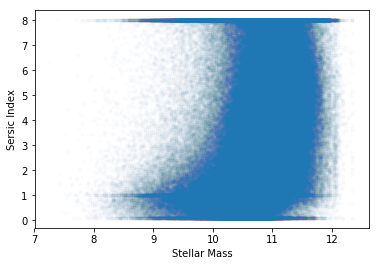

In [90]:
plt.figure()
plt.plot(StellarMass, SersicIndex, '.', alpha = 0.01)
plt.xlabel('Stellar Mass')
plt.ylabel('Sersic Index')

plt.show()

In [81]:
bins = np.arange(8.5, 12.5, 0.1)

array, binedges, number = stats.binned_statistic(StellarMass, SersicIndex, statistic = 'mean', bins = bins)
deviation, binedges, number = stats.binned_statistic(StellarMass, SersicIndex, statistic = 'std', bins = bins)


/Users/chris/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


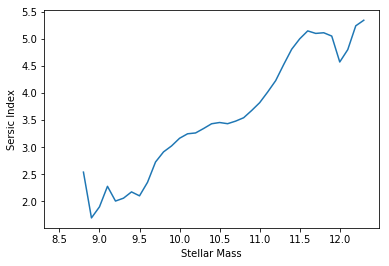

In [82]:
plt.figure()
plt.plot(bins[0:-1], array)
plt.xlabel('Stellar Mass')
plt.ylabel('Sersic Index')

plt.show()

In [83]:
Header = ["galcount", "z", "Vmaxwt", "MsMendSerExp", "AbsMag", "logReSerExp", "BT", "n_bulge", "newLcentsat", "NewMCentSat", "newMhaloL", "probaE", "probaEll", "probaS0", "probaSab", "probaScd", "TType", "AbsMagCent", "MsCent", "veldisp", "veldisperr", "AbsModel_newKcorr", "LCentSat", "raSDSS7", "decSDSS7", "Z", "sSFR", "FLAGsSFR", "MEDIANsSFR", "P16sSFR", "P84sSRF", "SFR", "FLAGSFR", "MEDIANSFR", "P16SFR", "P84SRF", "RA_SDSS", "DEC_SDSS", "Z_2", "Seperation"]

In [84]:
df = pd.read_csv("../../Data/Observational/Bernardi_SDSS/new_catalog_SFRs.dat", header = None, names = Header, delim_whitespace = True, skiprows = 1)

df['SerExpsSFR'] = df.apply(lambda row: row.SFR - row.MsMendSerExp, axis = 1) # Make a sSFR colum using the sersic exp photomotry

In [107]:
df["LCentSat"]

0           1.0
1           0.0
2           1.0
3           1.0
4           0.0
5           1.0
6           1.0
7           1.0
8           0.0
9           1.0
10          0.0
11          1.0
12          1.0
13          1.0
14          1.0
15          0.0
16          1.0
17          1.0
18          1.0
19          1.0
20          1.0
21          1.0
22          1.0
23          1.0
24          1.0
25          1.0
26          0.0
27          0.0
28          1.0
29          1.0
          ...  
485578   -999.0
485579   -999.0
485580   -999.0
485581   -999.0
485582   -999.0
485583   -999.0
485584   -999.0
485585   -999.0
485586   -999.0
485587   -999.0
485588   -999.0
485589   -999.0
485590   -999.0
485591   -999.0
485592   -999.0
485593   -999.0
485594   -999.0
485595   -999.0
485596   -999.0
485597   -999.0
485598   -999.0
485599   -999.0
485600   -999.0
485601   -999.0
485602   -999.0
485603   -999.0
485604   -999.0
485605   -999.0
485606   -999.0
485607   -999.0
Name: LCentSat, Length: 

In [130]:
flag_central = df["LCentSat"] == 1.

SersicIndex = np.array(df['n_bulge'])

StellarMass = np.array(df['MsCent'])
VMax = np.array(df["Vmaxwt"])

flag_hasMass = StellarMass != -999.
flag_is8 = SersicIndex != 8.
flag_is0 = SersicIndex != 0.1


StellarMass = StellarMass[flag_hasMass * flag_is8 * flag_is0 * flag_central]
SersicIndex = SersicIndex[flag_hasMass * flag_is8 * flag_is0 * flag_central]
VMax = VMax[flag_hasMass * flag_is8 * flag_is0 * flag_central]


288522

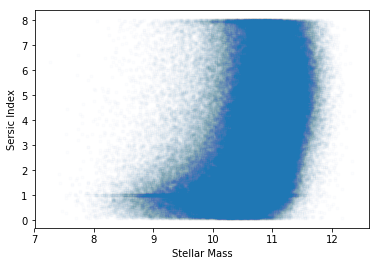

In [114]:
plt.figure()
plt.plot(StellarMass, SersicIndex, '.', alpha = 0.01)
plt.xlabel('Stellar Mass')
plt.ylabel('Sersic Index')
plt.show()

In [151]:
bins = np.arange(8.5, 12.5, 0.05)


array, edges, numbers = stats.binned_statistic(StellarMass, VMax*SersicIndex, statistic = 'sum', bins = bins)
den = stats.binned_statistic(StellarMass, VMax, statistic = 'sum', bins = bins)[0]

array = array/den

means = np.zeros(len(numbers))

for i in range(len(means)):
    means[i] = array[numbers[i]-1]

std_wrong = stats.binned_statistic(StellarMass, VMax*(SersicIndex - means)**2, statistic = 'sum', bins = bins)[0]
binCounts = stats.binned_statistic(StellarMass, means, statistic = 'count', bins = bins)[0]

dev = np.sqrt(std_wrong/(((binCounts-1)/binCounts)*den))

#std_right = std_wrong ** 2


/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


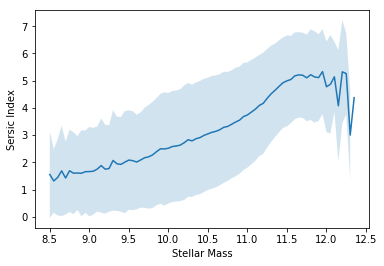

In [152]:
plt.figure()
plt.plot(bins[0:-1], array)q
plt.xlabel('Stellar Mass')
plt.ylabel('Sersic Index')

plt.fill_between(bins[0:-1], array-dev, array+dev, alpha=0.2)

plt.show()